In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
import seaborn as sns
from sklearn import preprocessing 
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_rows', 1000)
import warnings
warnings.filterwarnings('ignore')

Model AR jedna zmienna

In [3]:
path = r'C:\Users\natal\Desktop\Studia\Studia magisterskie\Praca magisterska\Dane walmart 2\train.csv'
def import_data_with_one_feature(path):
    data_train = pd.read_csv(path)
    data_train_clean = data_train[['Store','Date','Weekly_Sales']]
    data_train_ready = data_train_clean.groupby(['Date'], as_index=False).sum()
    data_train_ready = data_train_ready[['Date','Weekly_Sales']]
    return data_train_ready

In [4]:
data_train_ready = import_data_with_one_feature(path)
data_train_ready

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
5,2010-03-12,45925396.51
6,2010-03-19,44988974.64
7,2010-03-26,44133961.05
8,2010-04-02,50423831.26
9,2010-04-09,47365290.44


In [5]:
def display_time_series(data):
    sns.lineplot(x=data['Date'], y=data['Weekly_Sales'], marker='o')
    plt.tight_layout()
    plt.show()

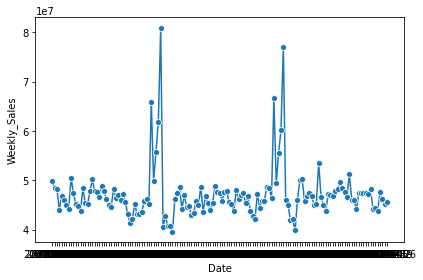

In [6]:
display_time_series(data_train_ready)

In [7]:
df_stationarityTest = adfuller(data_train_ready['Weekly_Sales'], autolag='AIC')
print("P-value: ", df_stationarityTest[1])
#szereg jest stacjonarny bo mniejsze od 0,05

P-value:  2.675979158986027e-07


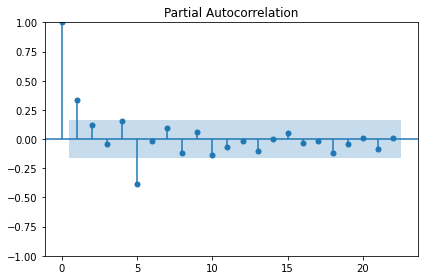

In [8]:
#wykres pacf - funkcja autokorelacji cząstkowej
plot_pacf(data_train_ready['Weekly_Sales'])
plt.tight_layout()
#lags=5

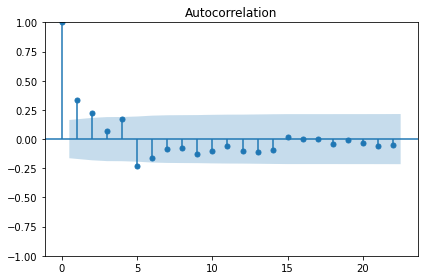

In [9]:
plot_acf(data_train_ready['Weekly_Sales'])
plt.tight_layout()
#odpowiedni może być model ma

                            AutoReg Model Results                             
Dep. Variable:           Weekly_Sales   No. Observations:                  128
Model:                     AutoReg(5)   Log Likelihood               -2070.081
Method:               Conditional MLE   S.D. of innovations        4930669.403
Date:                Sun, 21 Apr 2024   AIC                           4154.161
Time:                        11:57:24   BIC                           4173.847
Sample:                             5   HQIC                          4162.157
                                  128                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.349e+07   5.85e+06      5.723      0.000     2.2e+07     4.5e+07
Weekly_Sales.L1     0.3646      0.083      4.388      0.000       0.202       0.527
Weekly_Sales.L2     0.0806      

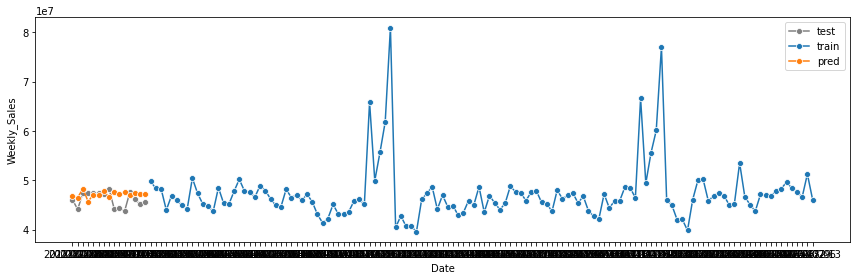

In [10]:
train_len = int(0.9* len(data_train_ready))
train = data_train_ready['Weekly_Sales'][:train_len]
ar_model = AutoReg(train, lags = 5).fit()
print(ar_model.summary())
pred = ar_model.predict(start=train_len, end=len(data_train_ready), dynamic=False)
print(pred)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=data_train_ready.Weekly_Sales[train_len:len(data_train_ready)], marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready.Date[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=pred, marker='o', label='pred')
plt.tight_layout()
plt.show()

Model VAR wiele zmiennych

In [11]:
def import_data_with_many_features(path):
    data_train = pd.read_csv(path)
    label_encoder = preprocessing.LabelEncoder()
    data_train['IsHoliday'] = label_encoder.fit_transform(data_train['IsHoliday'])
    data_train_clean = data_train[['Store','Date','Weekly_Sales', 'IsHoliday']]
    data_train_ready = data_train_clean.groupby(['Date','Store', 'IsHoliday'], as_index=False).sum()
    data_train_ready
    return data_train_ready

In [13]:
data_train_ready_many_features = import_data_with_many_features(path)
data_train_ready_many_features

,Date,Store,IsHoliday,Weekly_Sales
0,2010-02-05,1,0,1643690.90
1,2010-02-05,2,0,2136989.46
2,2010-02-05,3,0,461622.22
3,2010-02-05,4,0,2135143.87
4,2010-02-05,5,0,317173.10
...,...,...,...,...
6430,2012-10-26,41,0,1316542.59
6431,2012-10-26,42,0,514756.08
6432,2012-10-26,43,0,587603.55
6433,2012-10-26,44,0,361067.07


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 21, Apr, 2024
Time:                     11:57:49
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    19.5999
Nobs:                     5116.00    HQIC:                   19.3581
Log likelihood:          -70671.8    FPE:                2.24163e+08
AIC:                      19.2279    Det(Omega_mle):     2.11882e+08
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         28.958738         0.750385           38.592           0.000
L1.y1          0.642651         0.013975           45.987           0.000
L1.y2          0.413967         0.450149            0.920           0.358
L1.y3         -0.

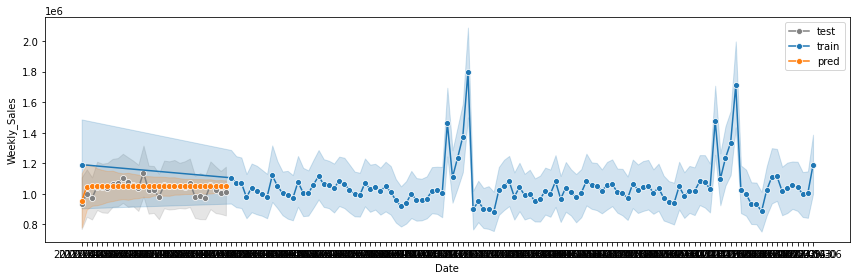

In [14]:
train_len = int(0.8* len(data_train_ready_many_features))
train = data_train_ready_many_features[:int(0.8*(len(data_train_ready_many_features)))]
test = data_train_ready_many_features[int(0.8*(len(data_train_ready_many_features))):]
train.index = train.Date
train = train.drop(['Date'],axis=1)
test.index = test.Date
test = test.drop(['Date'],axis=1)
var_model = VAR(np.asarray(train))
optimal_lags = var_model.select_order()
lag_order = optimal_lags.selected_orders['bic']
results = var_model.fit(lag_order)

forecast_input = train.values[-lag_order:]

print(results.summary())
pred = results.forecast(forecast_input,steps =len(test))

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready_many_features.Date[train_len:len(data_train_ready_many_features)], 
             y=data_train_ready_many_features.Weekly_Sales[train_len:len(data_train_ready_many_features)], marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready_many_features.Date[:train_len], y=data_train_ready_many_features.Weekly_Sales[:train_len], marker='o', label='train')
sns.lineplot(x=data_train_ready_many_features.Date[train_len:len(data_train_ready_many_features)], y=pred[:,2], marker='o', label='pred')
plt.tight_layout()
plt.show()

MA model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  114
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -1921.993
Date:                Sun, 24 Mar 2024   AIC                           3857.986
Time:                        13:20:42   BIC                           3877.139
Sample:                             0   HQIC                          3865.759
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.722e+07   7.59e-09   6.22e+15      0.000    4.72e+07    4.72e+07
ma.L1          0.4200      0.079      5.286      0.000       0.264       0.576
ma.L2          0.2930      0.104      2.827      0.0

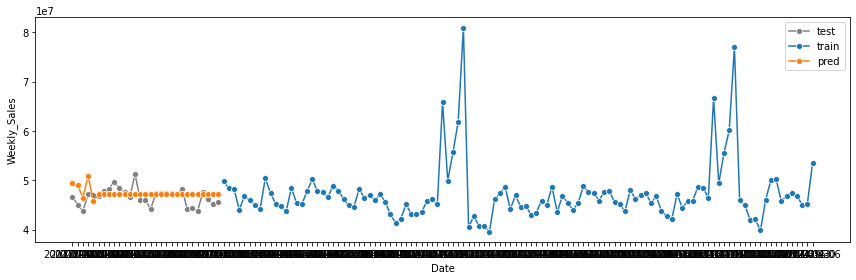

In [16]:
train_len = int(0.8* len(data_train_ready))
train = data_train_ready[:int(0.8*(len(data_train_ready)))]
test = data_train_ready[int(0.8*(len(data_train_ready))):]
train.index = train.Date
train = train.drop(['Date'],axis=1)
test.index = test.Date
test = test.drop(['Date'],axis=1)
model = ARIMA(np.asarray(train), order=(0,0,5))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
pred_ma = model_fit.get_forecast(steps=len(test))
pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
print(pred_ma_series.values)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=data_train_ready.Weekly_Sales[train_len:len(data_train_ready)], marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready.Date[:train_len], y=data_train_ready.Weekly_Sales[:train_len], marker='o', label='train')
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=pred_ma_series.values, marker='o', label='pred')
plt.tight_layout()
plt.show()

ARMA model


In [17]:
train_len = int(0.8* len(data_train_ready))
train = data_train_ready[:int(0.8*(len(data_train_ready)))]
test = data_train_ready[int(0.8*(len(data_train_ready))):]
train.index = train.Date
train = train.drop(['Date'],axis=1)
test.index = test.Date
test = test.drop(['Date'],axis=1)

In [18]:
p_params = range(0,25,2)
q_params = range(0,7,1)
# Create dictionary to store MAEs
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
      # Create key-value pair in dict. Key is `p`, value is empty list.
      mae_grid[p] = list()
      # Inner loop: Iterate through possible values for `q`
      for q in q_params:
           # Combination of hyperparameters for model
           order = (p, 0, q)
           # Train model
           model = ARIMA(train, order=order).fit()
           # Generate in-sample (training) predictions
           y_pred = model.predict()
           # Calculate training MAE
           mae = mean_absolute_error(train, y_pred)
           # Append MAE to list in dictionary
           mae_grid[p].append(mae)
           print(f"Trained ARIMA {order} with mae {mae}")
print(mae_grid)

Trained ARIMA (0, 0, 0) with mae 3334866.5861680526
Trained ARIMA (0, 0, 1) with mae 3186963.029215258
Trained ARIMA (0, 0, 2) with mae 3142150.7480254686
Trained ARIMA (0, 0, 3) with mae 3274100.170408012
Trained ARIMA (0, 0, 4) with mae 3178117.733794541
Trained ARIMA (0, 0, 5) with mae 3102775.64748399
Trained ARIMA (0, 0, 6) with mae 3106467.094098305
Trained ARIMA (2, 0, 0) with mae 3148905.828830875
Trained ARIMA (2, 0, 1) with mae 3073976.9372540927
Trained ARIMA (2, 0, 2) with mae 3181491.123354483
Trained ARIMA (2, 0, 3) with mae 3295053.9512227806
Trained ARIMA (2, 0, 4) with mae 3109489.1097545153
Trained ARIMA (2, 0, 5) with mae 3278601.1396936006
Trained ARIMA (2, 0, 6) with mae 3269010.47038855
Trained ARIMA (4, 0, 0) with mae 3153817.564881341
Trained ARIMA (4, 0, 1) with mae 3090831.847438617
Trained ARIMA (4, 0, 2) with mae 3148670.283043979
Trained ARIMA (4, 0, 3) with mae 3155499.2989179753
Trained ARIMA (4, 0, 4) with mae 3023406.547308706
Trained ARIMA (4, 0, 5) wi

In [19]:
mae_df = pd.DataFrame(mae_grid) 
mae_df.round(4)

,0,2,4,6,8,10,12,14,16,18,20,22,24
0,3.334867e+06,3.148906e+06,3.153818e+06,3.131871e+06,3.166682e+06,3.169270e+06,3.162748e+06,3.186269e+06,3.169049e+06,3.152093e+06,3.143749e+06,3.129784e+06,3.128811e+06
1,3.186963e+06,3.073977e+06,3.090832e+06,3.140800e+06,3.161239e+06,3.152286e+06,3.266182e+06,3.167381e+06,3.169161e+06,3.146514e+06,3.150867e+06,3.122825e+06,3.125037e+06
2,3.142151e+06,3.181491e+06,3.148670e+06,3.154464e+06,3.254783e+06,3.269709e+06,3.274213e+06,3.198354e+06,3.258958e+06,3.147157e+06,3.164201e+06,3.132054e+06,3.130643e+06
3,3.274100e+06,3.295054e+06,3.155499e+06,3.311846e+06,3.183080e+06,3.234446e+06,3.185038e+06,3.208881e+06,3.142954e+06,3.258989e+06,3.148213e+06,3.166275e+06,3.157517e+06
4,3.178118e+06,3.109489e+06,3.023407e+06,3.024327e+06,3.092356e+06,3.175695e+06,3.152401e+06,3.017244e+06,3.009468e+06,3.158312e+06,3.031463e+06,3.023663e+06,3.044422e+06
5,3.102776e+06,3.278601e+06,3.260234e+06,3.218026e+06,3.228744e+06,3.156915e+06,3.139551e+06,3.123773e+06,3.042730e+06,3.073094e+06,3.031296e+06,3.016704e+06,3.032996e+06
6,3.106467e+06,3.269010e+06,3.239220e+06,3.233934e+06,3.201472e+06,3.146489e+06,3.162035e+06,3.043469e+06,3.117068e+06,3.031859e+06,3.046588e+06,3.045429e+06,3.066705e+06


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  114
Model:                ARIMA(16, 0, 4)   Log Likelihood               -1916.865
Date:                Sun, 24 Mar 2024   AIC                           3877.730
Time:                        13:23:17   BIC                           3937.927
Sample:                             0   HQIC                          3902.161
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.722e+07   7.25e-08   6.51e+14      0.000    4.72e+07    4.72e+07
ar.L1          0.1362      0.229      0.594      0.552      -0.313       0.585
ar.L2          0.0908      0.234      0.387      0.6

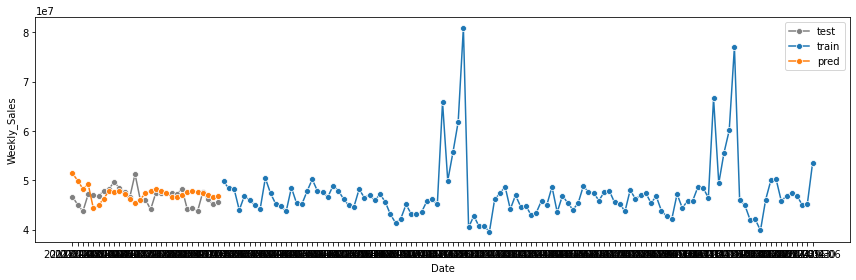

In [20]:
model = ARIMA(np.asarray(train), order=(16,0,4))
model_fit = model.fit()
print(model_fit.summary())
pred_ma = model_fit.get_forecast(steps=len(test))
pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
print(pred_ma_series.values)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=data_train_ready.Weekly_Sales[train_len:len(data_train_ready)], marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready.Date[:train_len], y=data_train_ready.Weekly_Sales[:train_len], marker='o', label='train')
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=pred_ma_series.values, marker='o', label='pred')
plt.tight_layout()
plt.show()

ARIMA model

In [ ]:
train_len = int(0.8* len(data_train_ready))
train = data_train_ready[:int(0.8*(len(data_train_ready)))]
test = data_train_ready[int(0.8*(len(data_train_ready))):]
train.index = train.Date
train = train.drop(['Date'],axis=1)
test.index = test.Date
test = test.drop(['Date'],axis=1)

In [52]:
p_params = range(0,25,2)
q_params = range(0,7,1)
# d_params = range(0,3,1)
mae_grid = dict()
for p in p_params:
      mae_grid[p] = list()
      for q in q_params:
      #      for d in d_params:
                  order = (p, 0, q)
                  # Train model
                  model = ARIMA(train, order=order).fit()
                  # Generate in-sample (training) predictions
                  y_pred = model.predict()
                  # Calculate training MAE
                  mae = mean_absolute_error(train, y_pred)
                  # Append MAE to list in dictionary
                  mae_grid[p].append(mae)
                  print(f"Trained ARIMA {order} with mae {mae}")
print(mae_grid)

Trained ARIMA (0, 0, 0) with mae 3334866.5861680526
Trained ARIMA (0, 1, 0) with mae 3933902.222719298
Trained ARIMA (0, 2, 0) with mae 6853234.798903113
Trained ARIMA (0, 0, 1) with mae 3186963.029215258
Trained ARIMA (0, 1, 1) with mae 3994520.2837500256
Trained ARIMA (0, 2, 1) with mae 4879811.614886701
Trained ARIMA (0, 0, 2) with mae 3142150.7480254686
Trained ARIMA (0, 1, 2) with mae 4062137.3976995265
Trained ARIMA (0, 2, 2) with mae 5003042.519183982
Trained ARIMA (0, 0, 3) with mae 3274100.170408012
Trained ARIMA (0, 1, 3) with mae 4031530.4784121206
Trained ARIMA (0, 2, 3) with mae 5148206.5080808485
Trained ARIMA (0, 0, 4) with mae 3178117.733794541
Trained ARIMA (0, 1, 4) with mae 4070532.728270771
Trained ARIMA (0, 2, 4) with mae 5389991.225130529
Trained ARIMA (0, 0, 5) with mae 3102775.64748399
Trained ARIMA (0, 1, 5) with mae 3966853.601090016
Trained ARIMA (0, 2, 5) with mae 5380453.92059248
Trained ARIMA (0, 0, 6) with mae 3106467.094098305
Trained ARIMA (0, 1, 6) wit

In [53]:
mae_df = pd.DataFrame(mae_grid) 
mae_df.round(4)

,0,2,4,6,8,10,12,14,16,18,20,22,24
0,3.334867e+06,3.148906e+06,3.153818e+06,3.131871e+06,3.166682e+06,3.169270e+06,3.162748e+06,3.186269e+06,3.169049e+06,3.152093e+06,3.143749e+06,3.129784e+06,3.128811e+06
1,3.933902e+06,3.956019e+06,4.047592e+06,3.971028e+06,3.990330e+06,3.997937e+06,4.020953e+06,4.035644e+06,4.067922e+06,4.048950e+06,4.059462e+06,4.060550e+06,4.091090e+06
2,6.853235e+06,5.248674e+06,4.689852e+06,4.936815e+06,4.873612e+06,4.950039e+06,4.928461e+06,4.936616e+06,5.006740e+06,5.047922e+06,5.065117e+06,5.091519e+06,5.141880e+06
3,3.186963e+06,3.073977e+06,3.090832e+06,3.140800e+06,3.161239e+06,3.152286e+06,3.266182e+06,3.167381e+06,3.169161e+06,3.146514e+06,3.150867e+06,3.122825e+06,3.125037e+06
4,3.994520e+06,3.991579e+06,4.060083e+06,4.037309e+06,3.998842e+06,4.053679e+06,4.053344e+06,4.050807e+06,4.069421e+06,4.019228e+06,4.028756e+06,4.053888e+06,4.089075e+06
5,4.879812e+06,5.071739e+06,5.102492e+06,5.153526e+06,5.173525e+06,5.222510e+06,5.304832e+06,5.333468e+06,5.421654e+06,5.374981e+06,5.391599e+06,5.355780e+06,5.413706e+06
6,3.142151e+06,3.181491e+06,3.148670e+06,3.154464e+06,3.254783e+06,3.269709e+06,3.274213e+06,3.198354e+06,3.258958e+06,3.147157e+06,3.164201e+06,3.132054e+06,3.130643e+06
7,4.062137e+06,3.930478e+06,4.092464e+06,4.047672e+06,3.988891e+06,4.057883e+06,4.041816e+06,4.038029e+06,4.043001e+06,4.050040e+06,4.029935e+06,4.058607e+06,4.057115e+06
8,5.003043e+06,4.898088e+06,5.096647e+06,5.167337e+06,5.187722e+06,5.171092e+06,5.272868e+06,5.389141e+06,5.415025e+06,5.359586e+06,5.419698e+06,5.369998e+06,5.418796e+06
9,3.274100e+06,3.295054e+06,3.155499e+06,3.311846e+06,3.183080e+06,3.234446e+06,3.185038e+06,3.208881e+06,3.142954e+06,3.258989e+06,3.148213e+06,3.166275e+06,3.157517e+06


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  114
Model:                ARIMA(16, 0, 4)   Log Likelihood               -1916.865
Date:                Sun, 24 Mar 2024   AIC                           3877.730
Time:                        13:08:53   BIC                           3937.927
Sample:                             0   HQIC                          3902.161
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.722e+07   7.25e-08   6.51e+14      0.000    4.72e+07    4.72e+07
ar.L1          0.1362      0.229      0.594      0.552      -0.313       0.585
ar.L2          0.0908      0.234      0.387      0.6

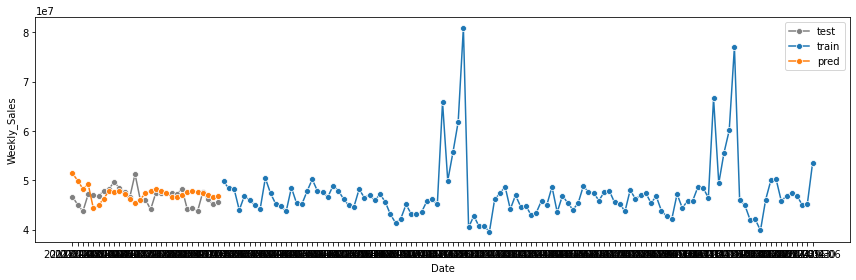

In [54]:
#parametry modelu arima są bez zmian ponieważ szereg jest stacjonarny
model = ARIMA(np.asarray(train), order=(16,0,4))
model_fit = model.fit()
print(model_fit.summary())
pred_ma = model_fit.get_forecast(steps=len(test))
pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
print(pred_ma_series.values)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=data_train_ready.Weekly_Sales[train_len:len(data_train_ready)], marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready.Date[:train_len], y=data_train_ready.Weekly_Sales[:train_len], marker='o', label='train')
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=pred_ma_series.values, marker='o', label='pred')
plt.tight_layout()
plt.show()

SARIMA model

In [21]:
import pmdarima as pmd

model=pmd.auto_arima(np.asarray(train),start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3886.296, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3876.060, Time=0.34 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3879.935, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4356.183, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3874.374, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=3875.883, Time=0.09 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=3874.676, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3875.641, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=3878.647, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=3876.670, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.918 seconds


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  114
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1958.831
Date:                Sun, 24 Mar 2024   AIC                           3921.662
Time:                        13:31:39   BIC                           3927.134
Sample:                             0   HQIC                          3923.882
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9903      0.010    102.261      0.000       0.971       1.009
sigma2      4.755e+13   2.51e-17   1.89e+30      0.000    4.76e+13    4.76e+13
Ljung-Box (L1) (Q):                  19.25   Jarque-

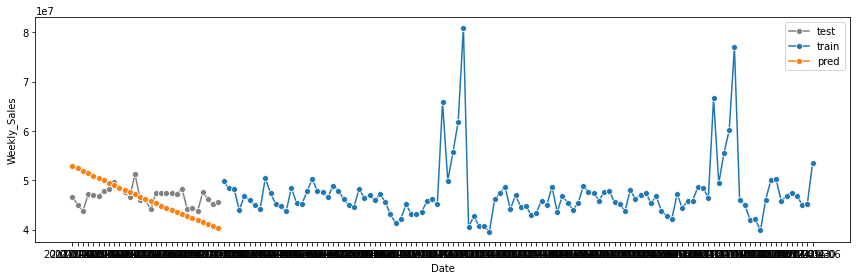

In [26]:
model = sm.tsa.statespace.SARIMAX(np.asarray(train),order=(1,0,0),seasonal_order=(0,0,0,12))
model_fit = model.fit()
print(model_fit.summary())
pred_ma = model_fit.get_forecast(steps=len(test))
pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
print(pred_ma_series.values)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=data_train_ready.Weekly_Sales[train_len:len(data_train_ready)], marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready.Date[:train_len], y=data_train_ready.Weekly_Sales[:train_len], marker='o', label='train')
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=pred_ma_series.values, marker='o', label='pred')
plt.tight_layout()
plt.show()

Drzewa decyzyjne - jedna zmienna

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import datetime as dt

In [16]:
data_train_ready['Date'] = pd.to_datetime(data_train_ready['Date'])

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.Date.dt.weekday
    df['quarter'] = df.Date.dt.quarter
    df['month'] = df.Date.dt.month
    df['year'] = df.Date.dt.year
    df['dayofyear'] = df.Date.dt.dayofyear
    df['dayofmonth'] = df.Date.dt.day
    df['weekofyear'] = df.Date.dt.isocalendar().week
    return df

data_train_ready = create_features(data_train_ready)

#adding lag featurs to dataset

data_train_ready.columns

Index(['Date', 'Weekly_Sales', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [50]:
train_len = int(0.9* len(data_train_ready))
train = data_train_ready[:train_len]
test = data_train_ready[train_len:]
X_train = train[['dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear']]
Y_train = train[['Weekly_Sales']]
X_test = test[[ 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear']]
Y_test = test[['Weekly_Sales']]

tree = DecisionTreeRegressor(random_state = 0) 
tree.fit(X_train, Y_train)
y_pred_tree = tree.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(Y_test, y_pred_tree)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1336726.681


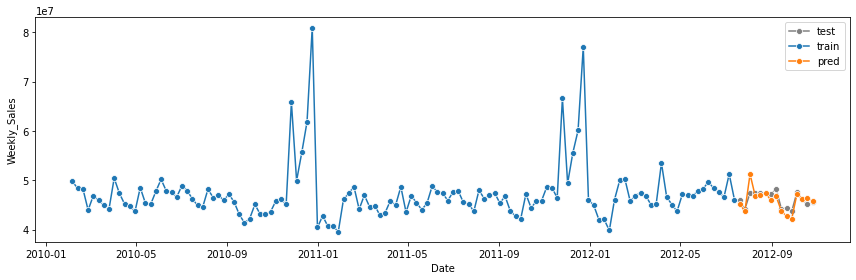

In [18]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=data_train_ready.Weekly_Sales[train_len:len(data_train_ready)], marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready.Date[:train_len], y=data_train_ready.Weekly_Sales[:train_len], marker='o', label='train')
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=y_pred_tree, marker='o', label='pred')
plt.tight_layout()
plt.show()

Drzewa decycyjne - dwie zmienne

In [19]:
data_train_ready_many_features['Date'] = pd.to_datetime(data_train_ready_many_features['Date'])

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.Date.dt.weekday
    df['quarter'] = df.Date.dt.quarter
    df['month'] = df.Date.dt.month
    df['year'] = df.Date.dt.year
    df['dayofyear'] = df.Date.dt.dayofyear
    df['dayofmonth'] = df.Date.dt.day
    df['weekofyear'] = df.Date.dt.isocalendar().week
    return df

data_train_ready_many_features = create_features(data_train_ready_many_features)

#adding lag featurs to dataset

data_train_ready_many_features.columns

Index(['Date', 'Store', 'IsHoliday', 'Weekly_Sales', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [47]:
train_len = int(0.9* len(data_train_ready_many_features))
train = data_train_ready_many_features[:train_len]
test = data_train_ready_many_features[train_len:]
X_train = train[['dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear','Store', 'IsHoliday']]
Y_train = train[['Weekly_Sales']]
X_test = test[[ 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear','Store', 'IsHoliday']]
Y_test = test[['Weekly_Sales']]

tree = DecisionTreeRegressor(random_state = 0) 
tree.fit(X_train, Y_train)
y_pred_tree = tree.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(Y_test, y_pred_tree)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  67057.688


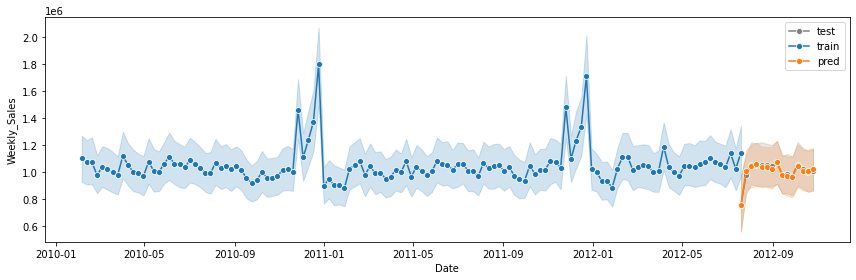

In [21]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready_many_features.Date[train_len:len(data_train_ready_many_features)],
              y=data_train_ready_many_features.Weekly_Sales[train_len:len(data_train_ready_many_features)], 
              marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready_many_features.Date[:train_len], y=data_train_ready_many_features.Weekly_Sales[:train_len], 
             marker='o', label='train')
sns.lineplot(x=data_train_ready_many_features.Date[train_len:len(data_train_ready_many_features)], y=y_pred_tree, marker='o', label='pred')
plt.tight_layout()
plt.show()

Drzewa decyzyjne - jedna zmienna -> szukanie parametrów

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import datetime
import glob
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder
import sklearn.cluster
from sklearn.cluster import KMeans
import os
from sklearn.preprocessing import StandardScaler
from datetime import date,timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2,f_classif,f_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [44]:
numerical = X_train.select_dtypes('number').columns
max_features = ['auto', 'sqrt']
criterion = ['friedman_mse', 'absolute_error', 'poisson']
splitter = ['best','random']
max_depth = [int(z) for z in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'criterion' : criterion,
               'splitter' : splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
grid_list = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 1, 0.2)}
numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical)
])

pipe = Pipeline([
    ('preprocessors', preprocessors),
    # ('select',SelectKBest(score_func=f_regression, k=4)),
    ('tree_one_feature',GridSearchCV(DecisionTreeRegressor(), param_grid = random_grid, 
        cv = 50, verbose=2, n_jobs = -1))])

pipe.fit(X_train,Y_train)
predictions = pipe.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(Y_test, predictions)), '.3f'))
print("\nRMSE: ", rmse)

Fitting 50 folds for each of 1296 candidates, totalling 64800 fits

RMSE:  1304330.673


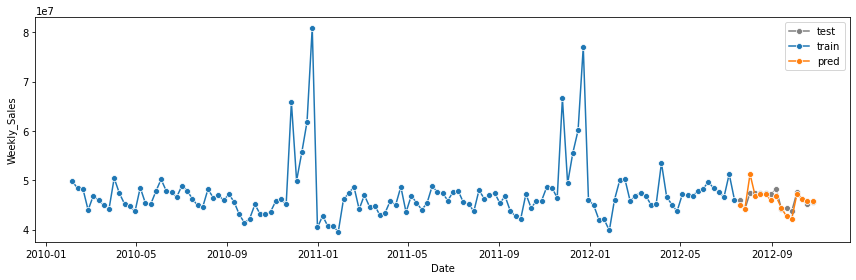

In [46]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=data_train_ready.Weekly_Sales[train_len:len(data_train_ready)], marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready.Date[:train_len], y=data_train_ready.Weekly_Sales[:train_len], marker='o', label='train')
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=predictions, marker='o', label='pred')
plt.tight_layout()
plt.show()

Drzewa decyzyjne - dwie zmienne -> szukanie parametrów

In [48]:
numerical = X_train.select_dtypes('number').columns
max_features = ['auto', 'sqrt']
criterion = ['friedman_mse', 'absolute_error', 'poisson']
splitter = ['best','random']
max_depth = [int(z) for z in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'criterion' : criterion,
               'splitter' : splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
grid_list = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 1, 0.2)}
numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical)
])

pipe = Pipeline([
    ('preprocessors', preprocessors),
    # ('select',SelectKBest(score_func=f_regression, k=4)),
    ('tree_many_features',GridSearchCV(DecisionTreeRegressor(), param_grid = random_grid, 
        cv = 50, verbose=2, n_jobs = -1))])

pipe.fit(X_train,Y_train)
predictions = pipe.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(Y_test, predictions)), '.3f'))
print("\nRMSE: ", rmse)

Fitting 50 folds for each of 1296 candidates, totalling 64800 fits

RMSE:  80462.111


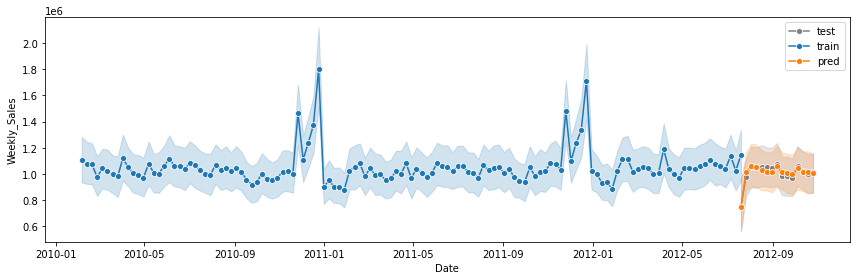

In [49]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready_many_features.Date[train_len:len(data_train_ready_many_features)],
              y=data_train_ready_many_features.Weekly_Sales[train_len:len(data_train_ready_many_features)], 
              marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready_many_features.Date[:train_len], y=data_train_ready_many_features.Weekly_Sales[:train_len], 
             marker='o', label='train')
sns.lineplot(x=data_train_ready_many_features.Date[train_len:len(data_train_ready_many_features)], y=predictions, marker='o', label='pred')
plt.tight_layout()
plt.show()

Las losowy - jedna zmienna 

In [53]:
numerical = X_train.select_dtypes('number').columns
n_estimators = [int(z) for z in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
criterion = ['friedman_mse', 'absolute_error', 'poisson']
max_depth = [int(z) for z in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators' : n_estimators,
                'criterion' : criterion,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap' : bootstrap}
grid_list = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 1, 0.2)}
numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical)
])

pipe = Pipeline([
    ('preprocessors', preprocessors),
    # ('select',SelectKBest(score_func=f_regression, k=4)),
    ('tree_one_feature',GridSearchCV(RandomForestRegressor(), param_grid = random_grid, 
        cv = 5, verbose=2, n_jobs = -1))])

pipe.fit(X_train,Y_train)
predictions = pipe.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(Y_test, predictions)), '.3f'))
print("\nRMSE: ", rmse)

Fitting 5 folds for each of 12960 candidates, totalling 64800 fits


KeyboardInterrupt: 

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=data_train_ready.Weekly_Sales[train_len:len(data_train_ready)], marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready.Date[:train_len], y=data_train_ready.Weekly_Sales[:train_len], marker='o', label='train')
sns.lineplot(x=data_train_ready.Date[train_len:len(data_train_ready)], y=predictions, marker='o', label='pred')
plt.tight_layout()
plt.show()

Las losowy - wiele zmiennych

In [ ]:
numerical = X_train.select_dtypes('number').columns
n_estimators = [int(z) for z in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
criterion = ['friedman_mse', 'absolute_error', 'poisson']
max_depth = [int(z) for z in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators' : n_estimators,
                'criterion' : criterion,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap' : bootstrap}
grid_list = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 1, 0.2)}
numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical)
])

pipe = Pipeline([
    ('preprocessors', preprocessors),
    # ('select',SelectKBest(score_func=f_regression, k=4)),
    ('tree_one_feature',GridSearchCV(RandomForestRegressor(), param_grid = random_grid, 
        cv = 5, verbose=2, n_jobs = -1))])

pipe.fit(X_train,Y_train)
predictions = pipe.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(Y_test, predictions)), '.3f'))
print("\nRMSE: ", rmse)

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data_train_ready_many_features.Date[train_len:len(data_train_ready_many_features)],
              y=data_train_ready_many_features.Weekly_Sales[train_len:len(data_train_ready_many_features)], 
              marker='o', label='test', color='grey')
sns.lineplot(x=data_train_ready_many_features.Date[:train_len], y=data_train_ready_many_features.Weekly_Sales[:train_len], 
             marker='o', label='train')
sns.lineplot(x=data_train_ready_many_features.Date[train_len:len(data_train_ready_many_features)], y=predictions, marker='o', label='pred')
plt.tight_layout()
plt.show()

XGBoost - jedna zmienna

In [ ]:
numerical = X_train.select_dtypes('number').columns
n_estimators = [int(z) for z in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
criterion = ['friedman_mse', 'absolute_error', 'poisson']
max_depth = [int(z) for z in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators' : n_estimators,
                'criterion' : criterion,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap' : bootstrap}
grid_list = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 1, 0.2)}
numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical)
])

pipe = Pipeline([
    ('preprocessors', preprocessors),
    # ('select',SelectKBest(score_func=f_regression, k=4)),
    ('tree_one_feature',GridSearchCV(RandomForestRegressor(), param_grid = random_grid, 
        cv = 5, verbose=2, n_jobs = -1))])

pipe.fit(X_train,Y_train)
predictions = pipe.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(Y_test, predictions)), '.3f'))
print("\nRMSE: ", rmse)